# Decision Tree for Classifying Heart Disease
Decision tree is a supervised learning algorithm that can be used for both classification and regression. 
This is an Example implementation for classifying a heart disease based on list of symptoms, that were all taken in consideration to differentiate dealing with continuous and discrete variables.
The dataset used is from Kaggle you can see [here](https://www.kaggle.com/ronitf/heart-disease-uci).


In [1]:
# Importing the required packages
import seaborn as sn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,plot_confusion_matrix
from sklearn import tree
import graphviz


## Preparing the Data


In [2]:
# Import Dataset 
balance_data = pd.read_csv('Data/heart.csv')
balance_data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [3]:
# Check dataset info
balance_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


### Convert Continuous Variables into Discrete
after an observation on the data these attributes (age,trestbps,chol,thalach,oldpeak) were continues, and the reason for that was the various and large range the values had.
each variable was converted using pandas cut() with appropriate range of values.


In [4]:
# age_range (0, 3]:0 'Baby/Toddler', (3, 17]: 1 'Child', (17, 63]: 2 'Adult', (63, 99]: 3 'Elderly'

balance_data['age'] = pd.cut(balance_data.age,[0,3,17,63,99],labels = False)


In [5]:
# trestbps_range [20, 119]:0 'normal', (119, 129]: 1 'elevated', (130, 400]: 2 'high blood pressure'

balance_data['trestbps'] = pd.cut(balance_data.trestbps,[20,119,129,400],right= False, labels = False )


In [6]:
# chol_range [100, 199]:0 'desirablr', [200, 239]: 1 'Borderline', [240, 700]: 2 'high'

balance_data['chol'] = pd.cut(balance_data.chol,[100,199,239,700] ,right= False, labels = False)


In [7]:
# thalach_range [0, 100]:0, [101, 200]: 1, [201, 350]: 2

balance_data['thalach'] = pd.cut(balance_data.thalach,[0,100,200,350] ,right= False, labels = False)


In [8]:
# oldpeak_range [0, 2.0]:0, (2.0, 5.0]: 1, (5.0, 8]: 2

balance_data['oldpeak'] = pd.cut(balance_data.oldpeak,[0,2,5,8] ,right= False, labels= False)


In [9]:
# Check Dataset info after converting 
balance_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   age       303 non-null    int64
 1   sex       303 non-null    int64
 2   cp        303 non-null    int64
 3   trestbps  303 non-null    int64
 4   chol      303 non-null    int64
 5   fbs       303 non-null    int64
 6   restecg   303 non-null    int64
 7   thalach   303 non-null    int64
 8   exang     303 non-null    int64
 9   oldpeak   303 non-null    int64
 10  slope     303 non-null    int64
 11  ca        303 non-null    int64
 12  thal      303 non-null    int64
 13  target    303 non-null    int64
dtypes: int64(14)
memory usage: 33.3 KB


In [10]:
# Dataset after converting
balance_data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,2,1,3,2,1,1,0,1,0,1,0,0,1,1
1,2,1,2,2,2,0,1,1,0,1,0,0,2,1
2,2,0,1,2,1,0,0,1,0,0,2,0,2,1
3,2,1,1,1,1,0,1,1,0,0,2,0,2,1
4,2,0,0,1,2,0,1,1,1,0,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,2,0,0,2,2,0,1,1,1,0,1,0,3,0
299,2,1,3,0,2,0,1,1,0,0,1,0,3,0
300,3,1,0,2,0,1,1,1,0,1,1,2,3,0
301,2,1,0,2,0,0,1,1,1,0,1,1,3,0


## Building Decision Tree  
after splitting the datat into train and test we created two decision tree classifier models Trying both of GiniIndex and Entropy measurements in order to compare there Results.


In [11]:
# Separating the target variable 
X = balance_data.drop(columns=['target'])
Y = balance_data.target 

In [12]:
# Splitting the dataset into train and test 
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3, random_state = 100) 

In [13]:
# perform training with giniIndex
# Creating the classifier object 
clf_gini = DecisionTreeClassifier(criterion = "gini",random_state =0) # Fit the model  
clf_gini.fit(X_train, y_train)

DecisionTreeClassifier(random_state=0)

In [14]:
# perform training with entropy
# Creating the classifier object  
clf_entropy = DecisionTreeClassifier(criterion = "entropy", random_state =0) # Fit the model  
clf_entropy.fit(X_train, y_train) 

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [15]:
# Function to make predictions 
def prediction(X_test, clf_object):
    # Predicton on test with giniIndex 
    y_pred = clf_object.predict(X_test)
    print("Predicted values:")
    print(y_pred)
    return y_pred 

In [16]:
# Function to calculate accuracy 
def cal_accuracy(y_test, y_pred):
    print ("Accuracy : ", accuracy_score(y_test,y_pred)*100) 

In [17]:
# Operational Phase 
print("Results Using Gini Index:") # Prediction using giniIndex 

print("Train:")
y_train_gini = prediction(X_train, clf_gini)
cal_accuracy(y_train, y_train_gini)

print("\n Test:")
y_test_gini = prediction(X_test, clf_gini)
cal_accuracy(y_test, y_test_gini)

print()

print("Results Using Entropy:") # Prediction using entropy 

print("Train:")
y_train_entropy = prediction(X_train, clf_entropy) 
cal_accuracy(y_train, y_train_entropy) 

print("\n Test:")
y_test_entropy = prediction(X_test, clf_entropy) 
cal_accuracy(y_test, y_test_entropy) 

Results Using Gini Index:
Train:
Predicted values:
[1 1 1 0 0 1 1 1 1 1 0 1 0 0 1 0 1 0 1 1 1 0 1 0 1 0 0 0 0 1 1 0 0 1 0 1 0
 1 0 1 1 0 0 1 1 0 1 1 1 1 0 0 1 0 0 1 1 1 1 0 0 0 1 1 1 0 1 0 1 1 0 1 1 1
 1 0 1 0 1 1 1 1 0 0 1 1 1 0 0 1 1 1 0 1 1 1 0 1 1 0 0 1 0 1 0 1 1 1 0 1 1
 0 0 1 0 1 1 0 1 1 1 0 1 0 0 0 1 0 0 1 0 1 0 1 1 1 1 1 1 0 0 1 0 1 1 1 1 1
 0 0 0 0 0 0 0 1 0 0 0 1 1 0 0 0 0 1 0 1 0 1 1 1 1 1 0 0 0 0 0 0 1 1 1 0 0
 0 0 1 1 1 1 1 0 0 1 1 1 1 1 1 0 1 0 0 0 1 0 1 1 1 0 1]
Accuracy :  99.52830188679245

 Test:
Predicted values:
[1 0 0 1 0 0 0 0 1 1 0 1 0 0 0 1 0 0 0 1 0 1 0 1 1 0 0 1 0 0 1 1 0 1 0 1 0
 1 1 1 1 0 0 0 0 1 0 1 0 1 1 1 1 0 1 1 0 1 1 1 0 0 0 1 1 0 0 0 0 1 0 1 1 1
 1 0 0 1 1 0 1 1 0 1 0 1 0 0 1 1 1]
Accuracy :  79.12087912087912

Results Using Entropy:
Train:
Predicted values:
[1 1 1 0 0 1 1 1 1 1 0 1 0 0 1 0 1 0 1 1 1 0 1 0 1 0 0 0 0 1 1 0 0 1 0 1 0
 1 0 1 1 0 0 1 1 0 1 1 1 1 0 0 1 0 0 1 1 1 1 0 0 0 1 1 1 0 1 0 1 1 0 1 1 1
 1 0 1 0 1 1 1 1 0 0 1 1 1 0 0 1 1 1 0 1 1 1 0 

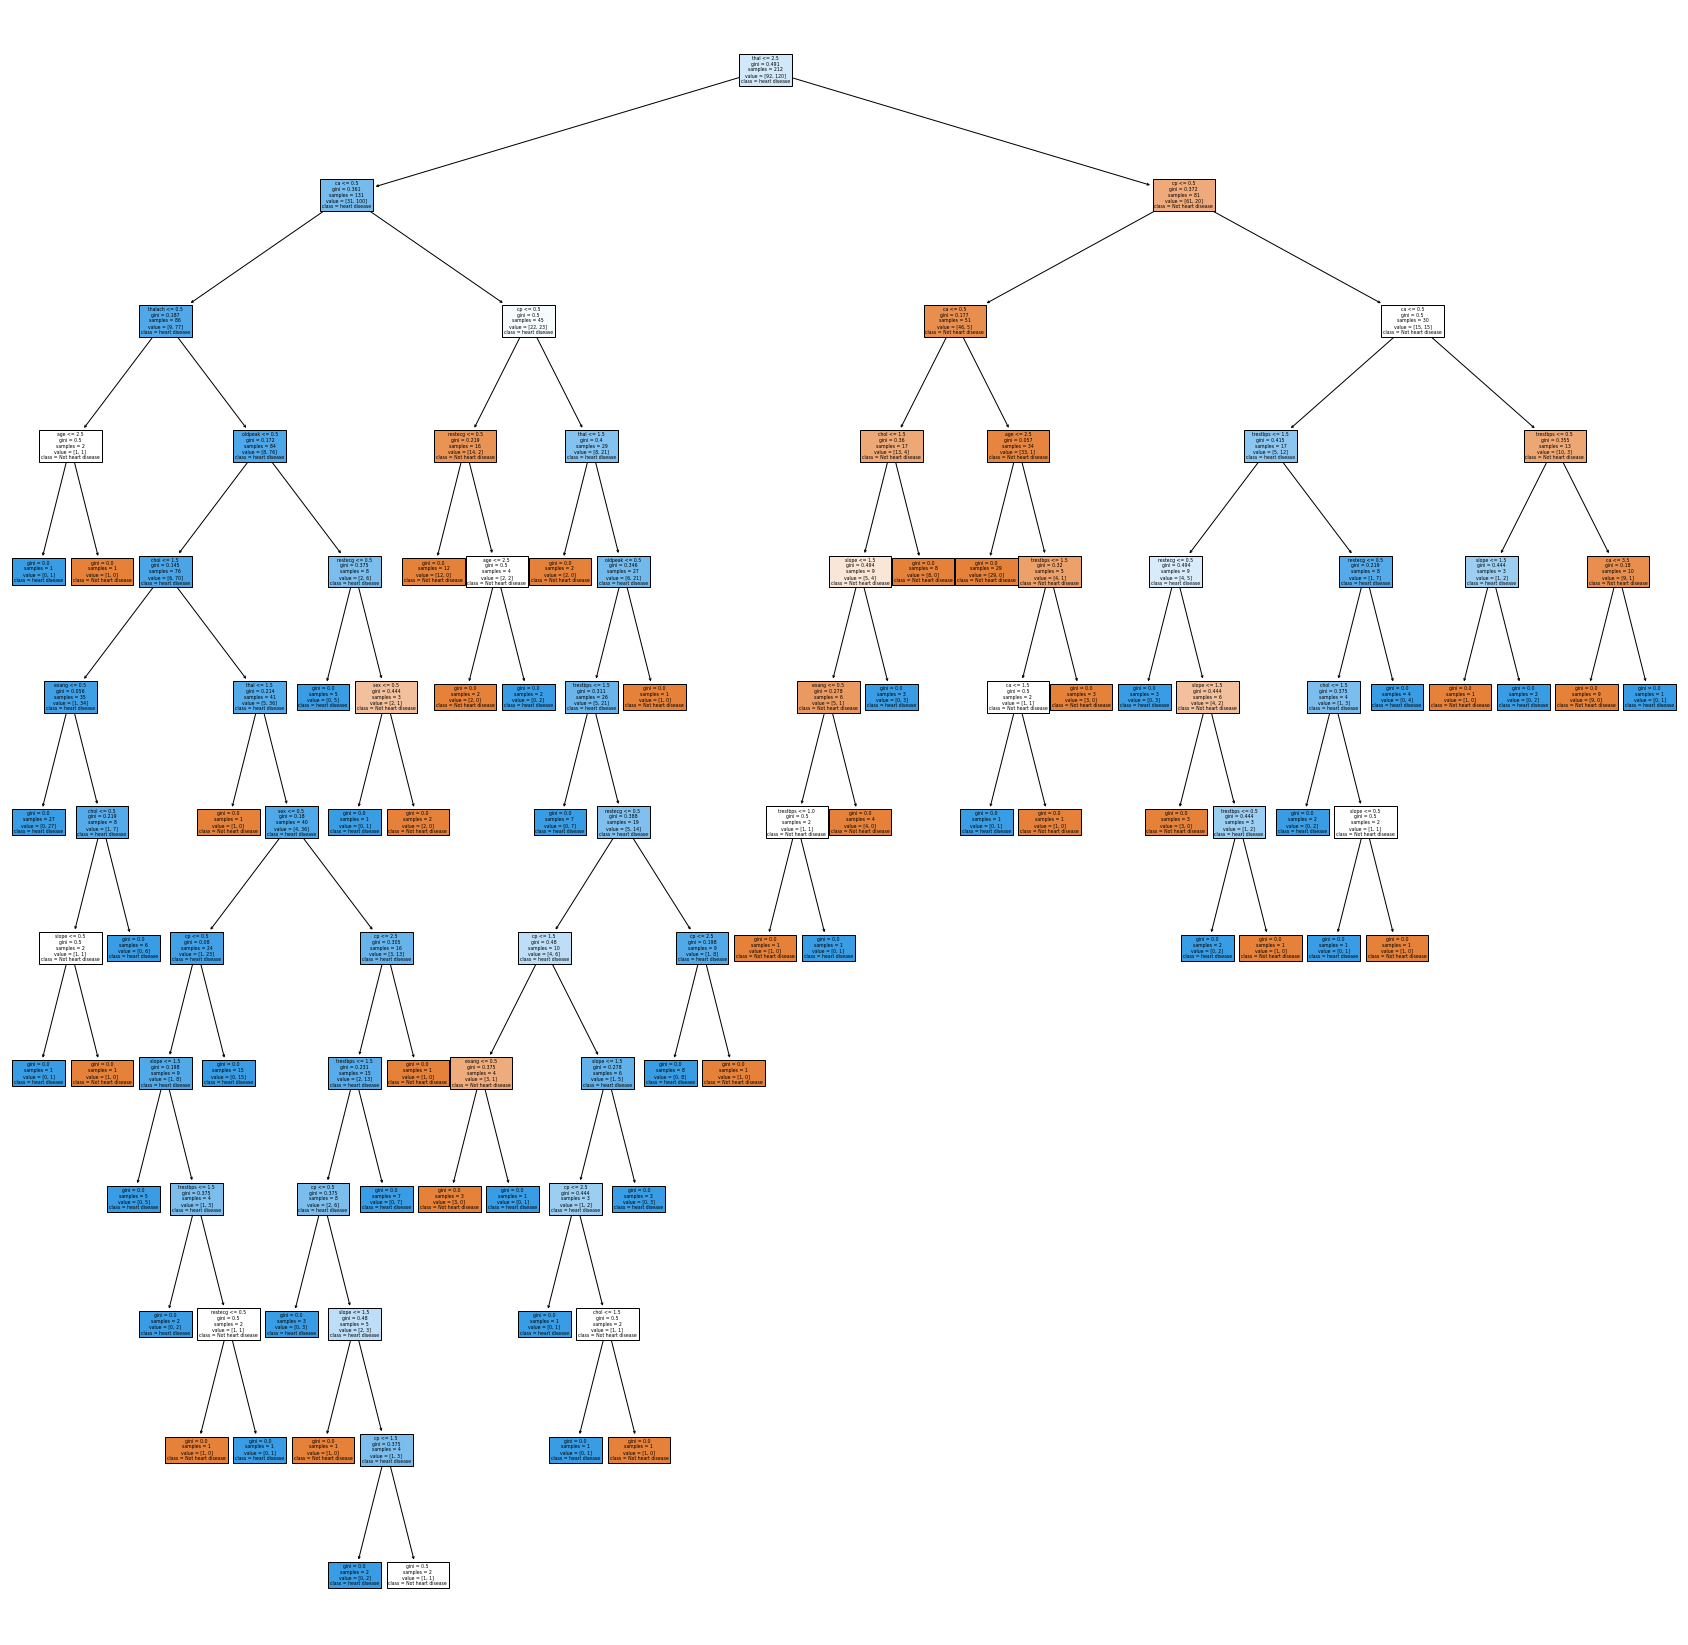

In [18]:
#Print giniIndex tree
plt.figure(figsize=(30,30))
features = balance_data.columns
classes = ['Not heart disease','heart disease']
tree.plot_tree(clf_gini,feature_names=features,class_names=classes,filled=True)
plt.show()


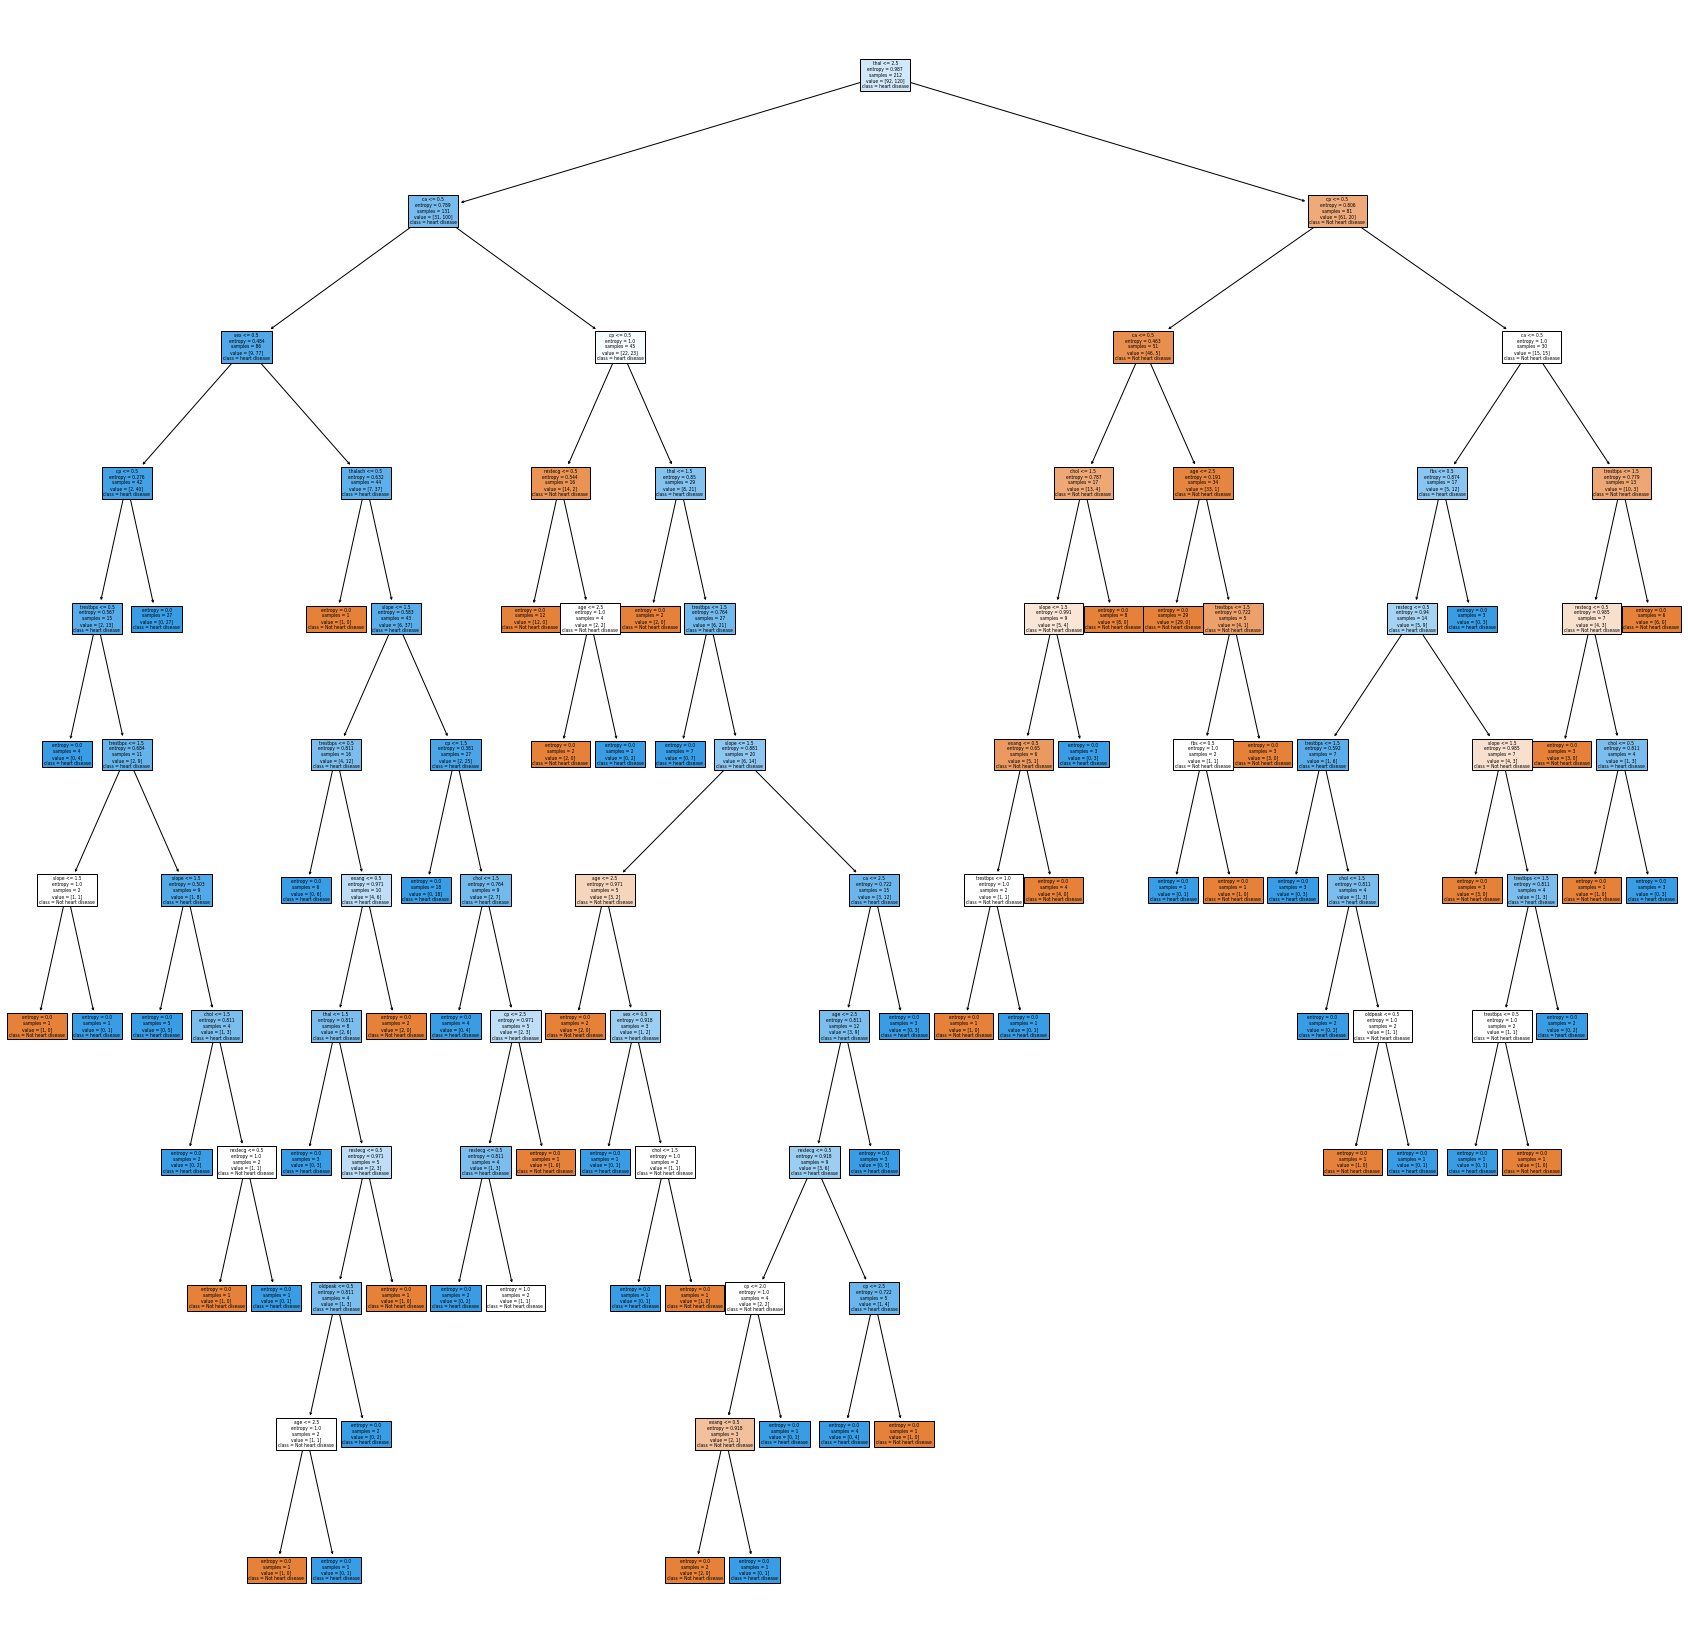

In [19]:
#Print entropy tree
plt.figure(figsize=(30,30))
features = balance_data.columns
tree.plot_tree(clf_entropy,feature_names=features,class_names=classes,filled=True)
plt.show()


Train Confusion matrix


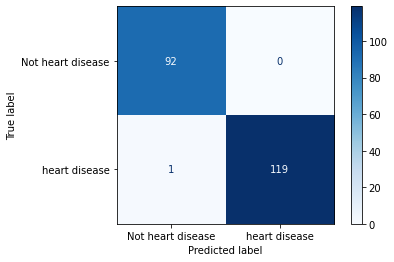

Accuracy :  99.52830188679245

Test Confusion matrix


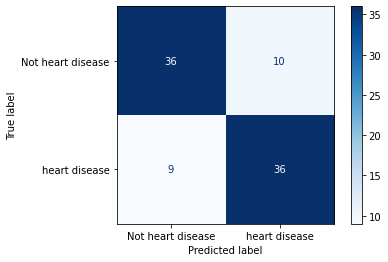

Accuracy :  79.12087912087912


In [20]:
#Confusion matrix for giniIndex
print("Train Confusion matrix")
plot_confusion_matrix(clf_gini, X_train, y_train,display_labels=classes,cmap='Blues')
plt.show()
cal_accuracy(y_train, y_train_gini)

print("\nTest Confusion matrix")
plot_confusion_matrix(clf_gini, X_test, y_test,display_labels=classes,cmap='Blues')
plt.show()
cal_accuracy(y_test, y_test_gini)


Train Confusion matrix


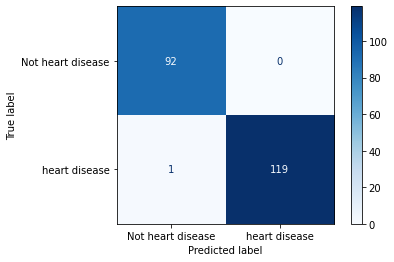

Accuracy :  99.52830188679245

Test Confusion matrix


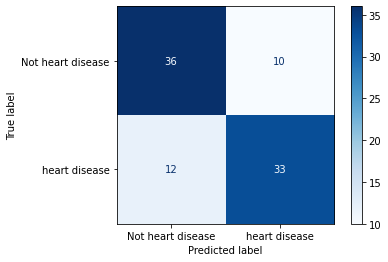

Accuracy :  75.82417582417582


In [21]:
#Confusion matrix for Entropy
print("Train Confusion matrix")
plot_confusion_matrix(clf_entropy, X_train, y_train,display_labels=classes,cmap='Blues')
plt.show()
cal_accuracy(y_train, y_train_entropy) 

print("\nTest Confusion matrix")
plot_confusion_matrix(clf_entropy, X_test, y_test,display_labels=classes,cmap='Blues')
plt.show()
cal_accuracy(y_test, y_test_entropy) 


### Gini vs Entropy
Firstly lets talk about the proper use for each one, Gini is to minimize misclassification and Entropy is for exploratory analysis. Secondly take the Computationally aspect in consideration, entropy is more complex since it makes use of logarithms and consequently, the calculation of the Gini Index will be faster. 
Based on **Pablo Aznar** analysis [here](https://quantdare.com/decision-trees-gini-vs-entropy/), the training time when using the entropy criterion is much higher and the time differences are more noticeable in larger datasets.  
in conclusion gini criterion is much faster because it is less computationally expensive and can deal with continuous variables, for that we lean to it.



## Pruning
the over models seem to be overfitting, for that to be avoided pruning is a solution. Pruning has two approaches Pre and Post pruning each has its pros and cons.


### Pre Pruning
Pre pruning is nothing but stoping the growth of decision tree on an early stage. For that we can limit the growth of trees by setting constrains using parameters like max_depth , min_samples etc.


In [22]:
#pre pruning giniIndex model
params = {'max_depth': [2,4,6,8,10,12],
         'min_samples_split': [2,3,4],
         'min_samples_leaf': [1,2]}
gcv_gini = GridSearchCV(estimator=clf_gini,param_grid=params)
gcv_gini.fit(X_train,y_train)

GridSearchCV(estimator=DecisionTreeClassifier(random_state=0),
             param_grid={'max_depth': [2, 4, 6, 8, 10, 12],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 3, 4]})

Train Confusion matrix


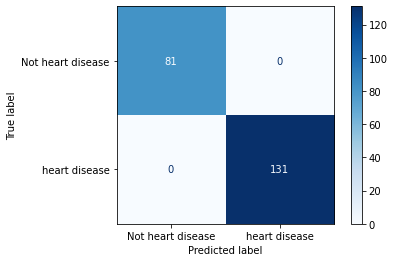

Accuracy :  86.32075471698113

Test Confusion matrix


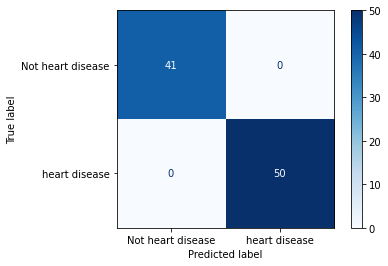

Accuracy :  83.51648351648352


In [23]:
model_gini = gcv_gini.best_estimator_
model_gini.fit(X_train,y_train)
y_train_pred = model_gini.predict(X_train)
y_test_pred = model_gini.predict(X_test)
print("Train Confusion matrix")
plot_confusion_matrix(model_gini, X_train, y_train_pred,display_labels=classes,cmap='Blues')
plt.show()
cal_accuracy(y_train, y_train_pred) 
print("\nTest Confusion matrix")
plot_confusion_matrix(model_gini, X_test, y_test_pred,display_labels=classes,cmap='Blues')
plt.show()
cal_accuracy(y_test, y_test_pred) 


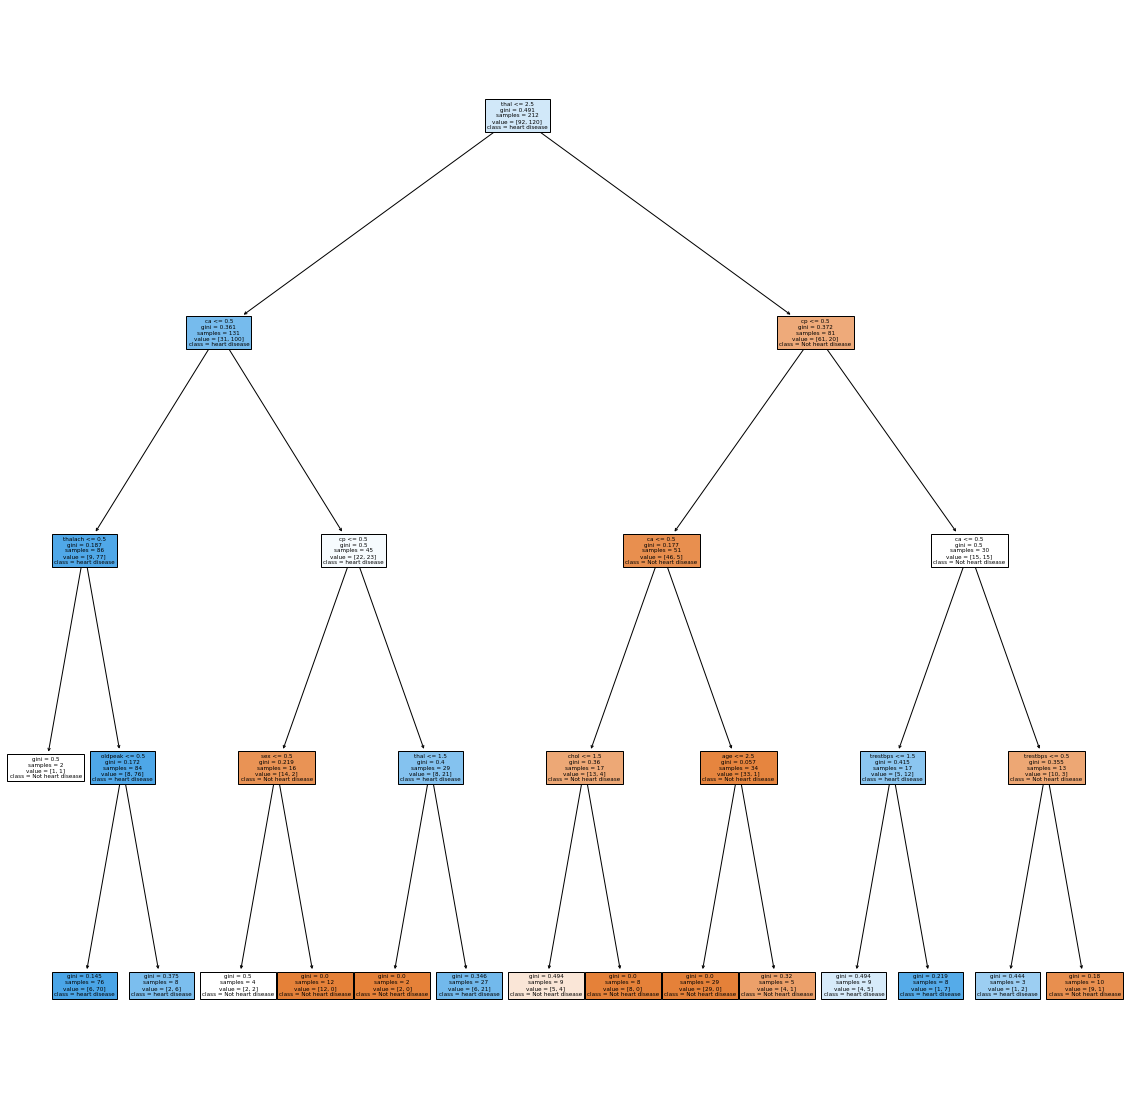

In [24]:
plt.figure(figsize=(20,20))
features = balance_data.columns
tree.plot_tree(model_gini,feature_names=features,class_names=classes,filled=True)
plt.show()
  

### Post Pruning
This technique is used after construction of decision tree.Cost complexity pruning is all about finding the right parameter for alpha.We will get the alpha values for this tree and will check the accuracy with the pruned trees. When use post pruning methods like cost complexity pruning it helps to improve test accuracy and get a better mode.

In [25]:
#post pruning giniIndex model
path = clf_gini.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities
print(ccp_alphas)

[0.         0.00226022 0.00235849 0.00262055 0.00275157 0.00305216
 0.00305481 0.00309224 0.00393082 0.00428459 0.00450418 0.00471698
 0.00479204 0.00602725 0.00626041 0.00628931 0.00774069 0.00825472
 0.00850906 0.01062676 0.0156877  0.02879174 0.03491831 0.04114659
 0.12593982]


In [26]:
# For each alpha we will append our model to a list
clfs = []
for ccp_alpha in ccp_alphas:
    clf = tree.DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    clf.fit(X_train, y_train)
    clfs.append(clf)

In [27]:
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

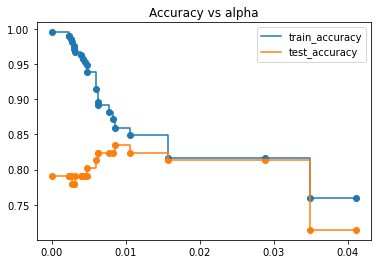

In [28]:
train_acc = []
test_acc = []
for c in clfs:
    y_train_pred = c.predict(X_train)
    y_test_pred = c.predict(X_test)
    train_acc.append(accuracy_score(y_train_pred,y_train))
    test_acc.append(accuracy_score(y_test_pred,y_test))

plt.scatter(ccp_alphas,train_acc)
plt.scatter(ccp_alphas,test_acc)
plt.plot(ccp_alphas,train_acc,label='train_accuracy',drawstyle="steps-post")
plt.plot(ccp_alphas,test_acc,label='test_accuracy',drawstyle="steps-post")
plt.legend()
plt.title('Accuracy vs alpha')
plt.show()

Train Confusion matrix


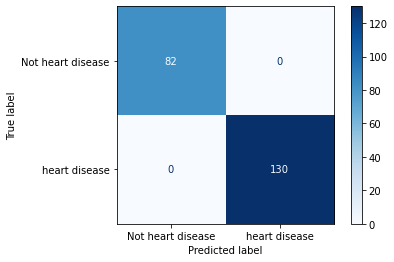

Accuracy :  85.84905660377359

Test Confusion matrix


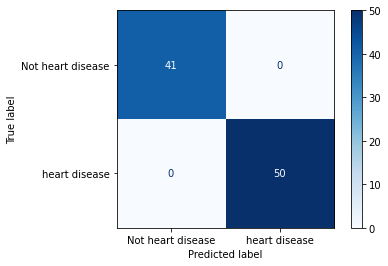

Accuracy :  83.51648351648352


In [29]:
#we choose alpha=0.009 because maximum value that test accuracy achieved
clf_ = tree.DecisionTreeClassifier(criterion = "gini",random_state=0,ccp_alpha=0.009) 
clf_.fit(X_train,y_train)
y_train_pred = clf_.predict(X_train)
y_test_pred = clf_.predict(X_test)
print("Train Confusion matrix")
plot_confusion_matrix(clf_, X_train, y_train_pred,display_labels=classes,cmap='Blues')
plt.show()
cal_accuracy(y_train, y_train_pred) 
print("\nTest Confusion matrix")
plot_confusion_matrix(clf_, X_test, y_test_pred,display_labels=classes,cmap='Blues')
plt.show()
cal_accuracy(y_test, y_test_pred) 


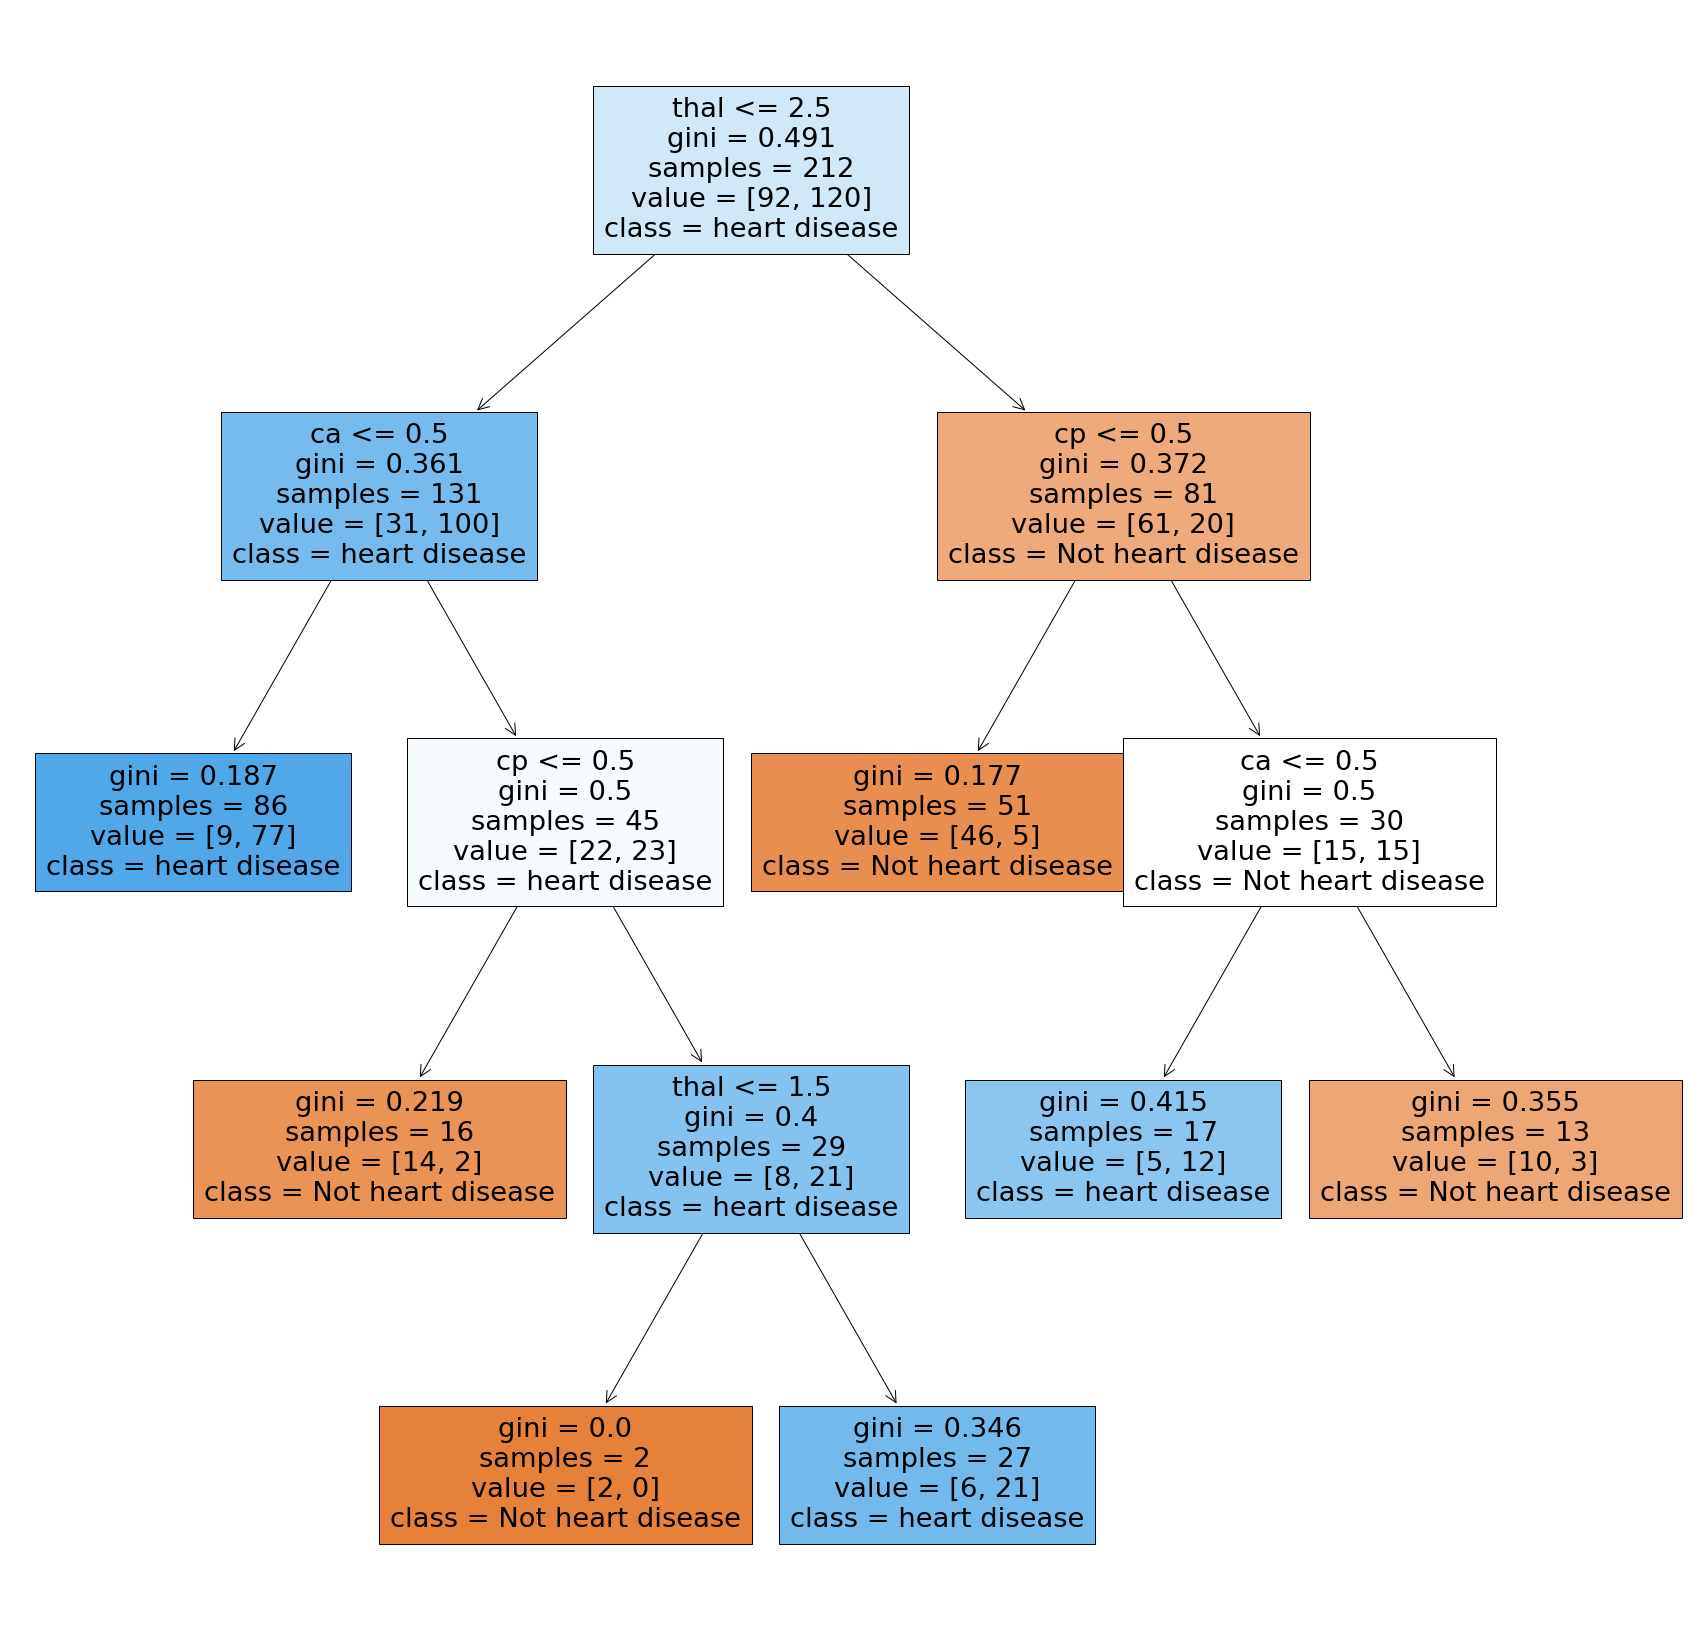

In [30]:
plt.figure(figsize=(30,30))
features = balance_data.columns
classes = ['Not heart disease','heart disease']
tree.plot_tree(clf_,feature_names=features,class_names=classes,filled=True)
plt.show()

### Pre or Post pruning?
Compared to post pruning, pre pruning is faster. This is especially important on larger (either more teatures or more data) datasets thats will avoid generating overly complex subtrees which overfit the training data. where post pruning has to evaluate a very large subset of trees.
Pre pruning can sometimes attain similar or even better results than post pruning. Usually results of post pruning is better because allows the tree to classify the training set then prune the tree.
